In [1]:
#IMPORTAZIONI E PARAMETRI DI BASE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

#dati file con anomalie 
df=pd.read_csv('anomalia_rumore_anomalo.csv')

df['datetime'] = pd.to_datetime(df['Timestamp'])

#print(df.columns)

df.set_index('datetime', inplace=True)

#print(df.head()) #controllo il nome esatti delle colonne.

# Aggiunta feature temporali
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek

# Calcolo derivata prima
df['dT'] = df['Temperatura (°C)'].diff()
df['dT_long'] = df['Temperatura (°C)'].diff(periods= 5) #differenza tra la temperatura attuale e quella di 5 righe prima

#Calcolo della media mobile
df['SMA_3'] = df['Temperatura (°C)'].rolling(window=3).mean()

# Rimuoviamo eventuali NaN dovuti alla media mobile (prime 2 righe)
df.dropna(inplace=True)

# Definizione delle feature per il modello includendo la media mobile
features = ['Temperatura (°C)', 'dT_long', 'dT', 'hour', 'SMA_3']
X = df[features]

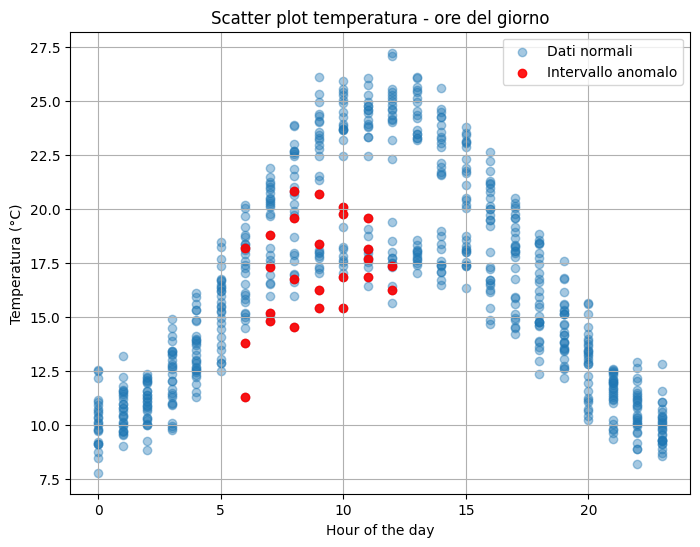

In [2]:
# SCATTER PLOT TEMPERATURA-ORA
plt.figure(figsize=(8, 6))

# Scatter di tutti i dati
plt.scatter(X['hour'], X['Temperatura (°C)'], alpha=0.4, label='Dati normali')

# Identifica l'intervallo da evidenziare
start = 20
end = 45

# Scatter dei dati anomali
X_anomalo = X.iloc[start:end]
plt.scatter(X_anomalo['hour'], X_anomalo['Temperatura (°C)'], color='red', label='Intervallo anomalo', alpha=0.9)

# Etichette e titolo
plt.ylabel('Temperatura (°C)')
plt.xlabel('Hour of the day')
plt.title('Scatter plot temperatura - ore del giorno')
plt.grid(True)
plt.legend()
plt.show()

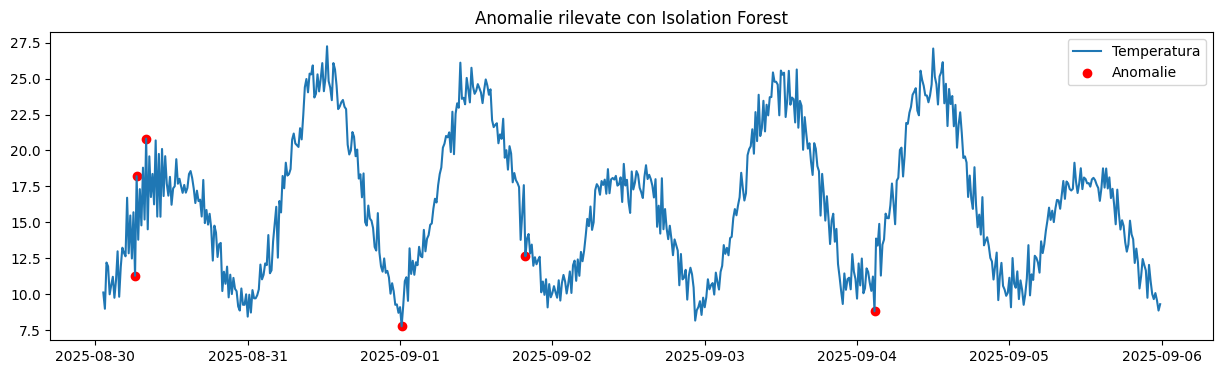

In [14]:
#Applichiamo il modello
model = IsolationForest(contamination=0.009, random_state=42) #contamination --> stai dicendo al modello quant è la % di dati anomali.
df['anomaly_score'] = model.fit_predict(X)

#Etichetta le anomalie: -1 = anomalia, 1 = normale
df['anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

#Mostra i risultati
#print(df[df['anomaly'] == 1].head())  # Mostra le prime anomalie

#random_state è un parametro che controlla la casualità interna di modelli che usano meccanismi randomici
#Assicuri che ogni volta che esegui il codice ottieni lo stesso risultato.

#Visualizza
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['Temperatura (°C)'], label='Temperatura')
plt.scatter(df[df['anomaly'] == 1].index, df[df['anomaly'] == 1]['Temperatura (°C)'], color='red', label='Anomalie')
plt.legend()
plt.title("Anomalie rilevate con Isolation Forest")
plt.show()

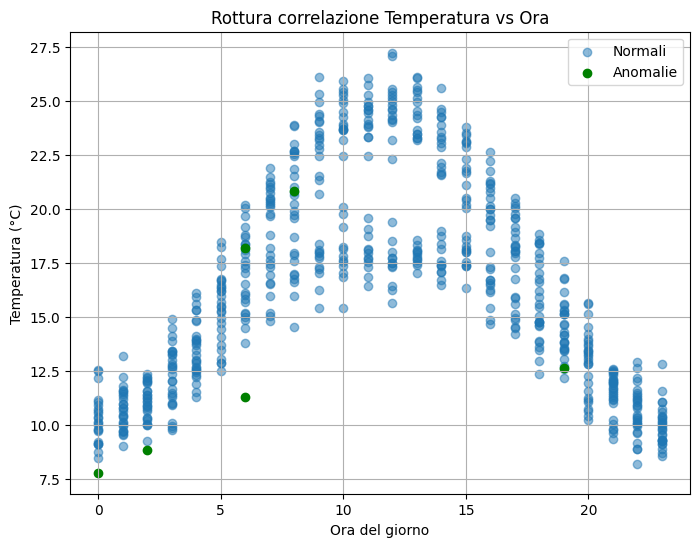

In [15]:
# Plot normali
normal = df[df['anomaly'] == 0]
anomaly = df[df['anomaly'] == 1]

plt.figure(figsize=(8, 6))
plt.scatter(normal['hour'], normal['Temperatura (°C)'], label='Normali', alpha=0.5)
plt.scatter(anomaly['hour'], anomaly['Temperatura (°C)'], color='green', label='Anomalie')
plt.xlabel('Ora del giorno')
plt.ylabel('Temperatura (°C)')
plt.title('Rottura correlazione Temperatura vs Ora')
plt.legend()
plt.grid(True)
plt.show()